<a href="https://colab.research.google.com/github/XiaoLiang28/Datamanagement/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good

descriptive stats should go before regressions

"The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions" (UNDP website).

There are different factors that can affect HDI. In this PS I imported variables in the Gender Inequality Index (GII) to explore the relationship between gender development and HDI.

My research question is what is relationship between HDI (DV) and female share of seats in parliament, population with at least some secondary education female, and Labour force participation rate female (IVs)? My hypothesis is all independent variables have positive correlations with the dependent variable, and the relationships are statistically significant.

The dataset is from my megred dataset in PS3.
Original data source: HDI: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI

GII: https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII

Gender Development Index (GDI): https://www.statista.com/statistics/1221302/gender-development-index/

# Set Up

In [2]:
#---------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

# Data Import

In [3]:
hdiG=pd.read_excel("https://github.com/XiaoLiang28/Datamanagement/raw/main/hdiG.xlsx")
hdiG.head(10)

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education female,Population with at least some secondary education male,Labour force participation rate female,Labour force participation rate male,_merge,GDI
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.00454,Very High,0.018,5.0,2.212,39.837398,96.858673,97.533417,61.728,72.705,both,0.97
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.10622,Very High,0.016,2.0,2.336,44.970414,99.094223,99.283562,60.294,71.950,both,0.98
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.04981,Very High,0.043,4.0,5.395,47.619048,99.768417,99.662552,61.671,70.463,both,0.98
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.84540,Very High,NaN,NaN,1.584,NaN,77.100433,83.368141,53.524,65.771,both,0.98
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.43335,Very High,0.073,6.0,8.096,37.885463,94.580063,94.430069,61.057,70.547,both,0.97
5,6,Denmark,0.948,81.3753,18.714800,12.960490,60364.78595,Very High,0.013,4.0,1.908,39.664804,95.067261,95.238098,57.721,66.653,both,0.98
6,7,Sweden,0.947,82.9833,19.418530,12.609720,54489.37401,Very High,0.023,4.0,3.345,46.991404,91.808403,92.224701,61.651,68.009,both,0.99
7,8,Ireland,0.945,81.9976,18.945221,11.582223,76168.98443,Very High,0.074,5.0,5.941,27.272727,88.127581,85.956813,56.526,68.573,both,0.99
8,9,Germany,0.942,80.6301,17.010139,14.090967,54534.21682,Very High,0.073,7.0,7.465,34.782609,96.073220,96.462144,56.843,66.041,both,0.98
9,10,Netherlands,0.941,81.6873,18.693165,12.581630,55979.41100,Very High,0.025,5.0,2.804,39.111111,89.808189,92.674728,62.444,71.315,both,0.97


In [4]:
hdiG.rename(columns={'Gross national income (GNI) per capita':'GNI', 'Population with at least some secondary education female':'secondaryF',
            'Population with at least some secondary education male':'secondaryM','Human Development Index (HDI) ':'HDI',
             'Labour force participation rate female':'labourF','Labour force participation rate male':'labourM' },inplace=True)

# General Description

In [5]:
hdiG.shape

(172, 18)

In [6]:
hdiG.describe()

,HDI Rank,HDI,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,secondaryF,secondaryM,labourF,labourM,GDI
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,169.000000,171.000000,172.000000,170.000000,171.000000,171.000000,172.000000,172.000000,172.000000
mean,95.110465,0.722326,71.344390,13.663146,8.994990,19991.534690,0.344467,157.614035,44.772994,25.282256,62.053826,66.516562,49.980453,69.878866,0.947506
std,56.151159,0.153346,7.790225,2.912409,3.239057,20220.758854,0.197687,233.658405,39.021278,12.363217,29.737575,26.637432,15.443528,8.512194,0.065949
min,1.000000,0.385000,52.525400,5.542510,2.114962,731.786709,0.013000,2.000000,1.584000,0.000000,6.395730,13.046886,5.995000,43.932000,0.496000
25%,46.750000,0.596000,65.672950,11.926486,6.203200,4609.355030,0.177000,11.500000,10.500000,16.666667,36.980984,44.433405,42.388000,65.127250,0.920750
50%,95.500000,0.739500,71.977150,13.694028,9.429850,12327.813500,0.364000,46.000000,35.461500,23.943966,68.897713,70.658863,51.980500,69.157500,0.970000
75%,144.500000,0.843000,76.957800,15.729518,11.610201,30271.837485,0.506000,185.500000,65.115250,34.533223,90.011884,92.449715,59.800500,75.351250,0.990000
max,191.000000,0.962000,85.473400,21.054590,14.090967,90918.644710,0.820000,1150.000000,170.462000,55.660377,100.000000,100.000000,82.501000,95.456000,1.030000


In [7]:
hdiG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HDI Rank                      172 non-null    int64  
 1   Country                       172 non-null    object 
 2   HDI                           172 non-null    float64
 3   Life expectancy at birth      172 non-null    float64
 4   Expected years of schooling   172 non-null    float64
 5   Mean years of schooling       172 non-null    float64
 6   GNI                           172 non-null    float64
 7   Human Development             172 non-null    object 
 8   GII Value                     169 non-null    float64
 9   Maternal mortality ratio      171 non-null    float64
 10  Adolescent birth rate         172 non-null    float64
 11  Share of seats in parliament  170 non-null    float64
 12  secondaryF                    171 non-null    float64
 13  secon

array([[<Axes: title={'center': 'HDI Rank'}>,
        <Axes: title={'center': 'HDI'}>,
        <Axes: title={'center': 'Life expectancy at birth'}>,
        <Axes: title={'center': 'Expected years of schooling'}>],
       [<Axes: title={'center': 'Mean years of schooling'}>,
        <Axes: title={'center': 'GNI'}>,
        <Axes: title={'center': 'GII Value'}>,
        <Axes: title={'center': 'Maternal mortality ratio'}>],
       [<Axes: title={'center': 'Adolescent birth rate'}>,
        <Axes: title={'center': 'Share of seats in parliament'}>,
        <Axes: title={'center': 'secondaryF'}>,
        <Axes: title={'center': 'secondaryM'}>],
       [<Axes: title={'center': 'labourF'}>,
        <Axes: title={'center': 'labourM'}>,
        <Axes: title={'center': 'GDI'}>, <Axes: >]], dtype=object)

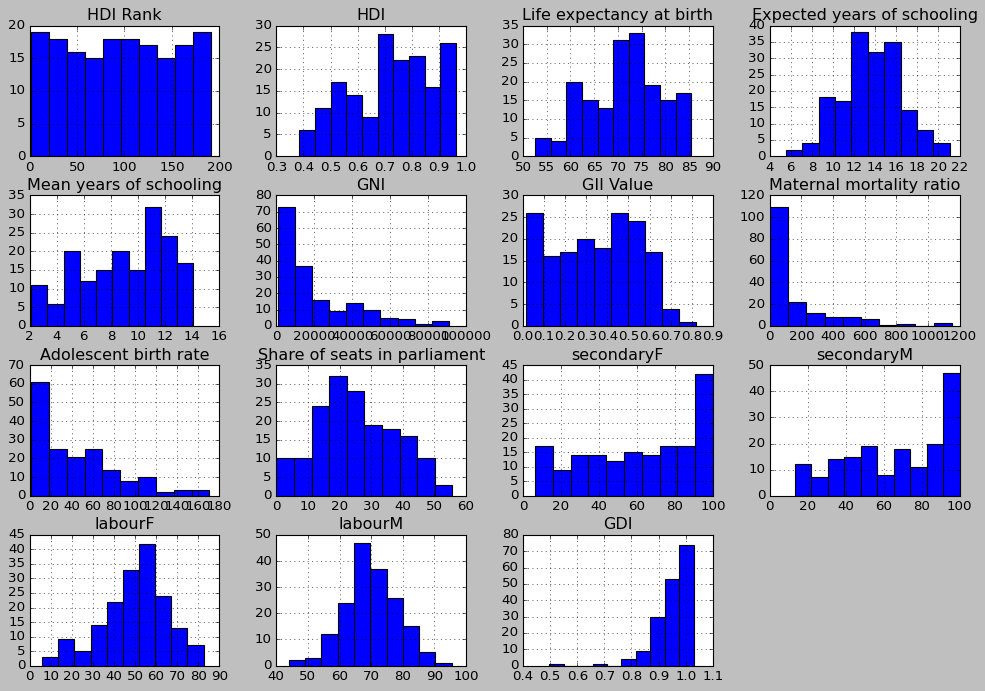

In [8]:
hdiG.hist(figsize=(15,10))

# Data Analysis

In [ ]:
variables = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'GNI','Maternal mortality ratio','Adolescent birth rate','Share of seats in parliament',
            'secondaryF','secondaryM','labourF','labourM' ]

In [ ]:
std_dev = hdiG[variables].std()

In [ ]:
std_dev

Life expectancy at birth            7.790225
Expected years of schooling         2.912409
Mean years of schooling             3.239057
GNI                             20220.758854
Maternal mortality ratio          233.658405
Adolescent birth rate              39.021278
Share of seats in parliament       12.363217
secondaryF                         29.737575
secondaryM                         26.637432
labourF                            15.443528
labourM                             8.512194
dtype: float64

In [12]:
hdiG[variables].describe().round(2)

NameError: ignored

In [10]:
corr_hdiG=hdiG.select_dtypes(include=[np.number])

In [11]:
corr=corr_hdiG.corr()['HDI'].drop('HDI')
print(corr)

HDI Rank                       -0.991743
Life expectancy at birth        0.913503
Expected years of schooling     0.909676
Mean years of schooling         0.915710
GNI                             0.825314
GII Value                      -0.914075
Maternal mortality ratio       -0.787786
Adolescent birth rate          -0.841010
Share of seats in parliament    0.253322
secondaryF                      0.865348
secondaryM                      0.835440
labourF                        -0.070763
labourM                        -0.166495
GDI                             0.620008
Name: HDI, dtype: float64


Variables have positive relationship with HDI: Life expectancy at birth, Expected years of schooling, Mean years of schooling, GNI, Share of seats in parliament, secondaryF, secondaryM, and GDI. Negitative relationship: HDI Rank, GII Value, Maternal mortality ratio, Adolescent birth rate, labourF and labourM. It is very interesting that both female's and male's labour participation rate has a slight negitative correlation with HDI.

In [ ]:
import statsmodels.api as sm

In [ ]:
hdiG1=hdiG.dropna()

In [ ]:
#dependent = 'HDI'
independent = hdiG1[[ 'Share of seats in parliament',
                    'labourM']]

In [ ]:
independent.corr().round(2)

,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,secondaryF,secondaryM,labourF,labourM,GII Value
Maternal mortality ratio,1.00,0.75,-0.16,-0.70,-0.64,0.23,0.11,0.71
Adolescent birth rate,0.75,1.00,-0.10,-0.73,-0.69,0.26,0.26,0.81
Share of seats in parliament,-0.16,-0.10,1.00,0.17,0.17,0.28,0.06,-0.42
secondaryF,-0.70,-0.73,0.17,1.00,0.97,-0.10,-0.27,-0.81
secondaryM,-0.64,-0.69,0.17,0.97,1.00,-0.09,-0.28,-0.78
labourF,0.23,0.26,0.28,-0.10,-0.09,1.00,0.43,-0.07
labourM,0.11,0.26,0.06,-0.27,-0.28,0.43,1.00,0.16
GII Value,0.71,0.81,-0.42,-0.81,-0.78,-0.07,0.16,1.00


In [ ]:
hdiG1.dtypes

HDI Rank                          int64
Country                          object
HDI                             float64
Life expectancy at birth        float64
Expected years of schooling     float64
Mean years of schooling         float64
GNI                             float64
Human Development                object
GII Value                       float64
Maternal mortality ratio        float64
Adolescent birth rate           float64
Share of seats in parliament    float64
secondaryF                      float64
secondaryM                      float64
labourF                         float64
labourM                         float64
_merge                           object
GDI                             float64
dtype: object

In [ ]:
#a=independent.dropna()
hdiG1['aa']=hdiG1['Share of seats in parliament']

<ipython-input-147-ffa1822bb1b3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import statsmodels.formula.api as smm

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

result = smm.ols(formula="price ~ mpg + rep78 + turn + gear_ratio", data=auto).fit()


In [ ]:
#x=hdiG1['HDI']
result = smm.ols(formula="HDI ~ aa + labourF + secondaryF",data=hdiG1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HDI   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.95e-51
Time:                        00:28:33   Log-Likelihood:                 199.63
No. Observations:                 169   AIC:                            -391.3
Df Residuals:                     165   BIC:                            -378.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4319      0.025     17.495      0.0

HDI=0.4319+0.0014Share of seats in parliament-0.0003labourF+0.0043secondaryF

For every 1% increase in the percentage of share of seats in parliament by female, the HDI value increases 0.0014. The share of seats in parliament by female is positively associated with HDI value, and the relationship is statistically significant.

For every 1% increase in the rate of female labour participation, the HDI value decreases 0.0003. The rate of female labour participation is negatively associated with HDI value, but the relationship is not statistically significant.

For every 1% increase in the rate of population with at least some secondary education female, the HDI value increases 0.0043. The rate of population with at least some secondary education female is positively associated with HDI value, and the relationship is statistically significant.

This regression model explains 76.4% of the variance of the HDI value.

# Visualization

<ipython-input-117-487cd0debd48>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



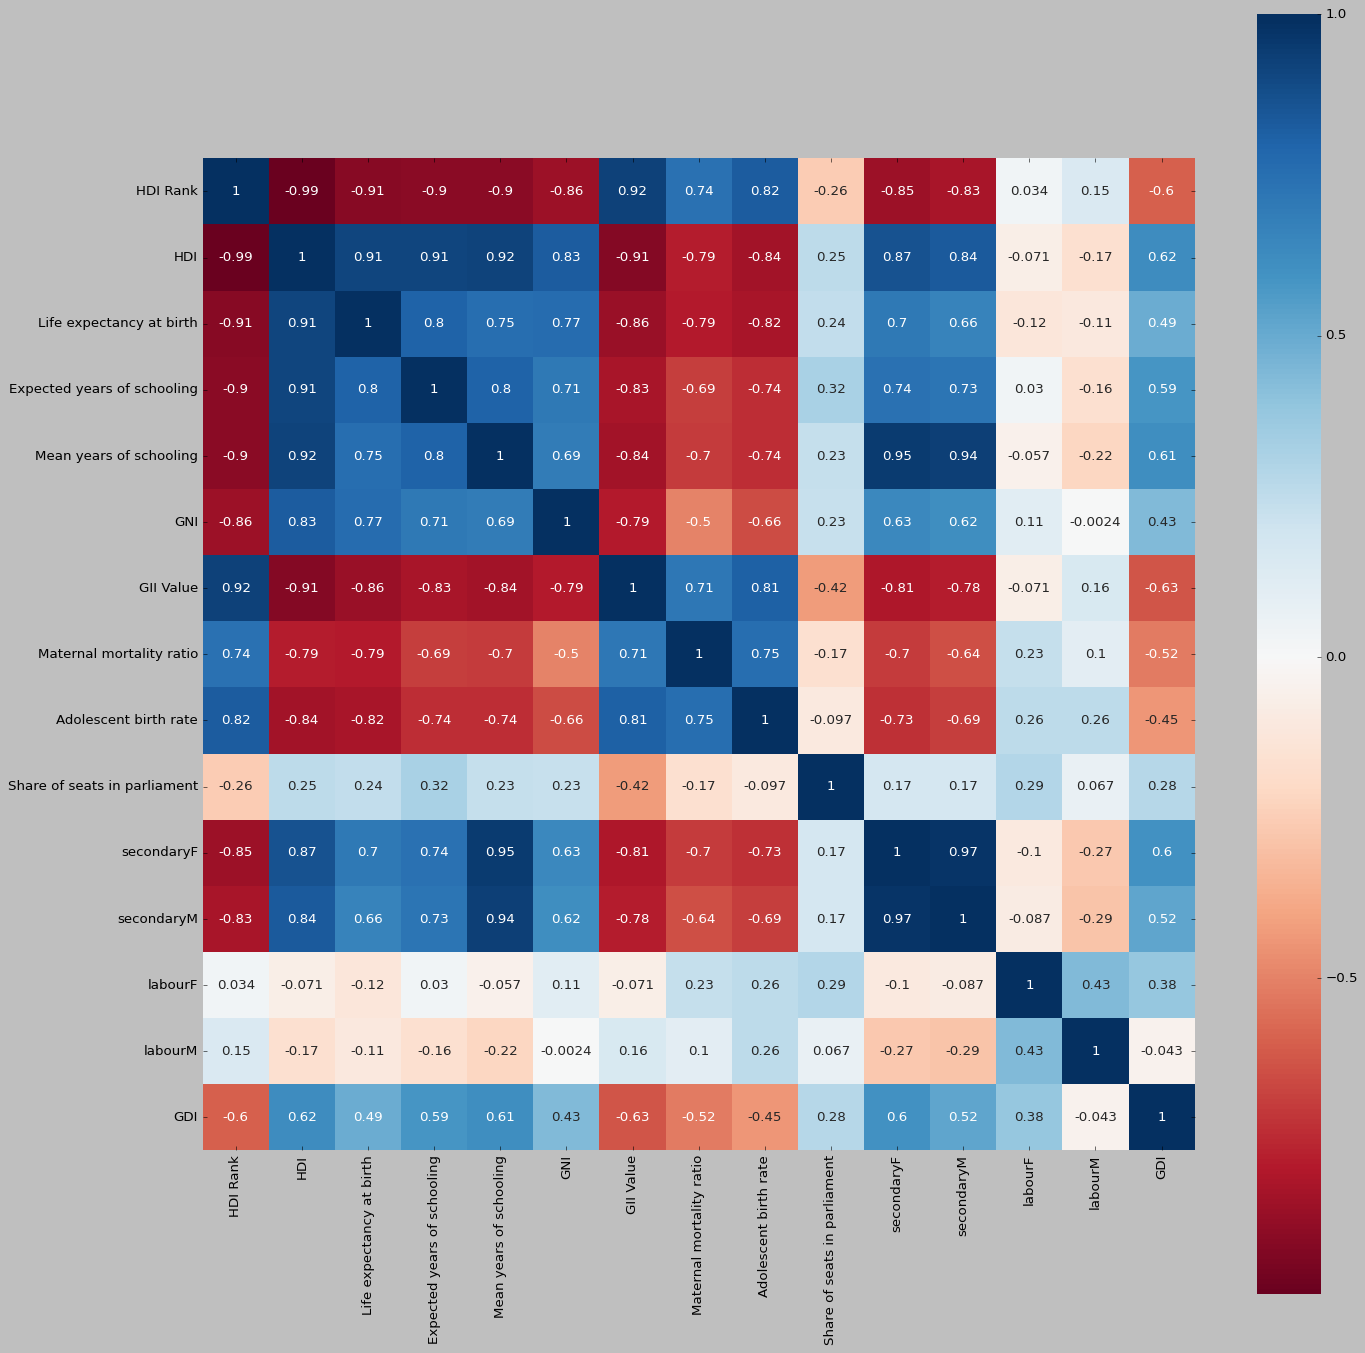

In [ ]:
import seaborn as sns

corrmat = hdiG.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

In [ ]:
import plotly.express as px

In [ ]:
px.bar(hdiG.head(10).sort_values(by=['Share of seats in parliament']),x="Country",y="Share of seats in parliament",title="Share of seats in parliament in the top 10 HDI ranked contries")

In [ ]:
px.bar(hdiG.tail(10).sort_values(by=['Share of seats in parliament']),x="Country",y="Share of seats in parliament",title="Share of seats in parliament in the bottom 10 HDI ranked contries")

Some least developed countries also have 30%-40% share of seats in parliament occupied by women, which is close to the best developed countries.

"While a proportional
 representation electoral system, women's participation in the labor force, the cultural
 standing of women, and the country's level of development all have positive effects
 on female representation in OECD democracies, none of these variables have a
 statistically significant and positive effect in less developed countries. These findings
 strongly suggest the existence of a threshold. Only after that threshold is passed do
 proportional representation, labor force participation, and cultural standing exert
 positive influences on the representation of women" (Matland, 1998, p. 109).

 It seems like that the relationship between women's political participation and HDI is more complicated.

 Reference: Matland, Richard E. “Women’s Representation in National Legislatures: Developed and Developing Countries.” Legislative Studies Quarterly, vol. 23, no. 1, 1998, pp. 109–25. JSTOR, https://doi.org/10.2307/440217. Accessed 5 Dec. 2023.

In [ ]:
px.bar(hdiG.head(10).sort_values(by=['secondaryF']),x="Country",y="secondaryF",title="Population with at least some secondary education female in the top 10 HDI ranked contries")

In [ ]:
px.bar(hdiG.tail(10).sort_values(by=['secondaryF']),x="Country",y="secondaryF",title="Population with at least some secondary education female in the bottom 10 HDI ranked contries")

There is a huge gap in women's education between most and least developed countries.

In [ ]:
px.bar(hdiG.head(10).sort_values(by=['labourF']),x="Country",y="labourF",title="Labour force participation rate female in the top 10 HDI ranked contries")

In [ ]:
px.bar(hdiG.tail(10).sort_values(by=['labourF']),x="Country",y="labourF",title="Labour force participation rate female in the bottom 10 HDI ranked contries")

Some least developed countries have a higher female labour participation rate than most developed countries.

# Conclusion and Limitations

Conclusion: The regression moodel shows that the percentage of share of seats in parliament by female and the rate of population with at least some secondary education female are positively associated with the HDI value, and the relationship is statistically significant. While the rate of female labour participation is not statistically significant with the HDI value.

Limitations: More variables and panel data are needed. Countries should be researched under their unique political and cultural contexts.